# Fundamental of Data Science


# Download Libraries

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.plotting.register_matplotlib_converters()
import plotly.express as px
import plotly.graph_objects as go

# Read data

In [2]:
df = pd.read_csv('StudentsPerformance.xla')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
df.shape

(1000, 8)

In [69]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [70]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# data processing

# missing values

In [44]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# outliers

Text(0, 0.5, 'score')

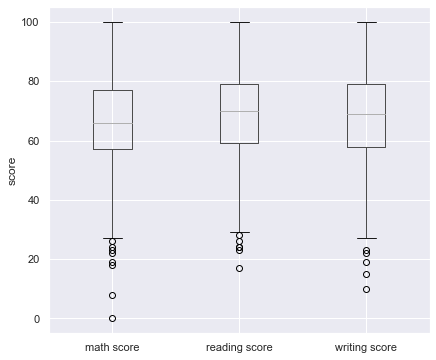

In [73]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df.boxplot(column=['math score', 'reading score', 'writing score'])
fig.set_title('')
fig.set_ylabel('score')

In [74]:
df[(df['math score']<0) | (df['math score']>100)].size + df[(df['reading score']<0) | (df['reading score']>100)].size + df[(df['writing score']<0) | (df['writing score']>100)].size

0

# delete column

In [75]:
df.drop('race/ethnicity',axis = 1,inplace= True)

In [76]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


# Convert data from object toint

In [77]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

encoder = LabelEncoder()
df['test preparation course'] = encoder.fit_transform(df['test preparation course'])


In [78]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,bachelor's degree,standard,1,72,72,74
1,0,some college,standard,0,69,90,88
2,0,master's degree,standard,1,90,95,93
3,1,associate's degree,free/reduced,1,47,57,44
4,1,some college,standard,1,76,78,75


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int32 
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   int32 
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int32(2), int64(3), object(2)
memory usage: 47.0+ KB


# data exploration 

In [79]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [80]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [81]:
df['reading score'].unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [133]:
df['writing score'].unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

In [82]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [83]:
df['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [84]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [85]:
df['test preparation course'].value_counts()

1    642
0    358
Name: test preparation course, dtype: int64

In [86]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [87]:
df.groupby("gender")['math score'].mean()

gender
0    63.633205
1    68.728216
Name: math score, dtype: float64

In [88]:
df.groupby("gender")['reading score'].mean()

gender
0    72.608108
1    65.473029
Name: reading score, dtype: float64

In [89]:
df.groupby("gender")['writing score'].mean()

gender
0    72.467181
1    63.311203
Name: writing score, dtype: float64

In [90]:
df.groupby(['gender']).agg(['min','median','max'])

test preparation course            math score              \
                           min median max        min median  max   
gender                                                             
0                            0      1   1          0     65  100   
1                            0      1   1         27     69  100   

       reading score             writing score              
                 min median  max           min median  max  
gender                                                      
0                 17     73  100            10     74  100  
1                 23     66  100            15     64  100

In [91]:
df[(df['gender'] == 1) &
     (df['math score'] > 90) & 
     (df['writing score'] > 90) &
     (df['reading score'] > 90)]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,1,associate's degree,free/reduced,0,100,100,93
571,1,bachelor's degree,standard,1,91,96,92
625,1,some college,standard,0,100,97,99
864,1,associate's degree,standard,1,97,93,91
916,1,bachelor's degree,standard,0,100,100,100
919,1,some college,standard,0,91,96,91


In [107]:
df[(df['gender'] == 0) &
     (df['math score'] > 90) & 
     (df['writing score'] > 90) &
     (df['reading score'] > 90)]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,0,bachelor's degree,standard,0,99,100,100
165,0,bachelor's degree,standard,0,96,100,100
179,0,some high school,standard,0,97,100,100
451,0,some college,standard,1,100,92,97
458,0,bachelor's degree,standard,1,100,100,100
546,0,some high school,standard,0,92,100,97
566,0,bachelor's degree,free/reduced,0,92,100,100
594,0,bachelor's degree,standard,0,92,100,99
685,0,master's degree,standard,0,94,99,100
712,0,some college,standard,1,98,100,99


In [92]:
df[['lunch','gender','math score','reading score','writing score']].groupby(['lunch','gender']).agg('median')

math score  reading score  writing score
lunch        gender                                          
free/reduced 0             57.0           67.0           68.0
             1             62.0           61.0           59.0
standard     0             67.0           75.0           76.0
             1             72.0           67.5           67.0

In [93]:
df[['parental level of education','gender','math score','reading score','writing score']].groupby(['parental level of education','gender']).agg('median')

math score  reading score  writing score
parental level of education gender                                          
associate's degree          0             65.0           75.5           74.0
                            1             72.0           68.0           65.5
bachelor's degree           0             67.0           76.0           80.0
                            1             70.0           67.0           68.0
high school                 0             61.0           69.5           68.0
                            1             66.0           61.5           58.5
master's degree             0             64.5           74.0           76.5
                            1             79.0           77.0           74.0
some college                0             65.5           74.0           74.5
                            1             69.0           63.5           62.5
some high school            0             63.0           71.0           72.0
                            1             68.0           66.0           61.5

In [94]:
df[['test preparation course','gender','math score','reading score','writing score']].groupby(['test preparation course','gender']).agg('median')

math score  reading score  writing score
test preparation course gender                                          
0                       0               67             78             79
                        1               73             71             70
1                       0               62             71             70
                        1               67             63             60

In [95]:
df.groupby('parental level of education')['writing score'].max().sort_values(ascending=False)

parental level of education
associate's degree    100
bachelor's degree     100
high school           100
master's degree       100
some high school      100
some college           99
Name: writing score, dtype: int64

In [96]:
df.groupby('parental level of education')['math score'].max().sort_values(ascending=False)

parental level of education
associate's degree    100
bachelor's degree     100
some college          100
high school            99
some high school       97
master's degree        95
Name: math score, dtype: int64

In [97]:
df.groupby('parental level of education')['reading score'].max().sort_values(ascending=False)

parental level of education
associate's degree    100
bachelor's degree     100
master's degree       100
some college          100
some high school      100
high school            99
Name: reading score, dtype: int64

In [98]:
df.groupby('lunch')['reading score'].max().sort_values(ascending=False)

lunch
free/reduced    100
standard        100
Name: reading score, dtype: int64

In [99]:
df.groupby('lunch')['math score'].max().sort_values(ascending=False)

lunch
free/reduced    100
standard        100
Name: math score, dtype: int64

In [100]:
df.groupby('test preparation course')['reading score'].max().sort_values(ascending=False)

test preparation course
0    100
1    100
Name: reading score, dtype: int64

# data visualization

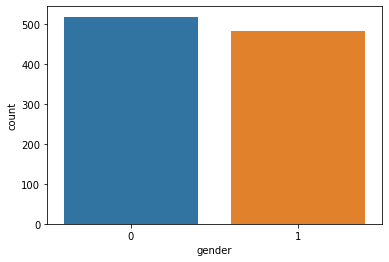

In [45]:
sns.countplot(x = 'gender',data= df)
plt.show()

<AxesSubplot:xlabel='gender', ylabel='writing score'>

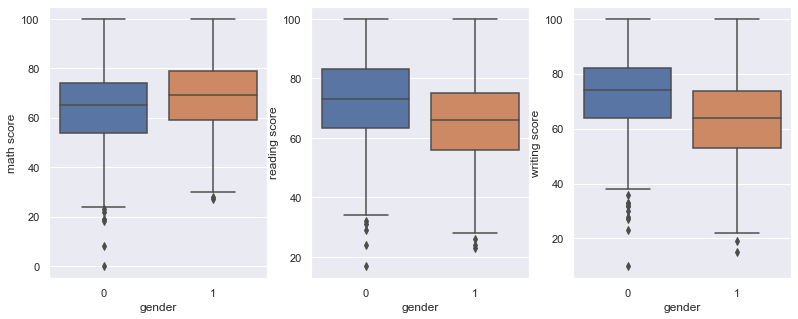

In [125]:
plt.figure(figsize=[18,5])
plt.subplot(141)
sns.boxplot(y='math score', x = 'gender', data = df)
plt.subplot(142)
sns.boxplot(y='reading score', x = 'gender',data = df)
plt.subplot(143)
sns.boxplot(y='writing score', x = 'gender',data = df)


C:\Users\reemh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



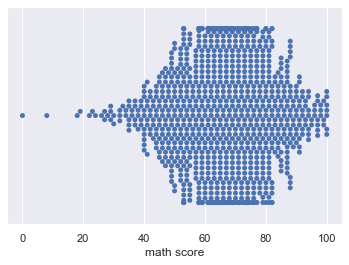

In [128]:
a = sns.swarmplot(x=df['math score'])

C:\Users\reemh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



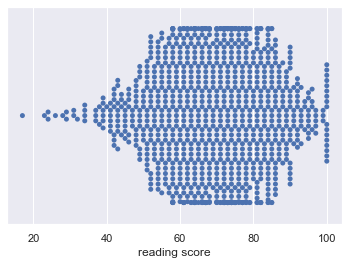

In [129]:
a = sns.swarmplot(x=df['reading score'])

C:\Users\reemh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



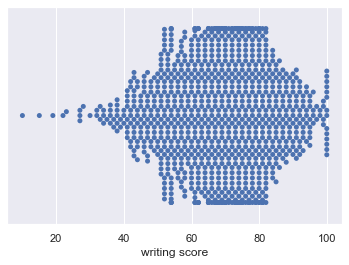

In [130]:
a = sns.swarmplot(x=df['writing score'])

In [47]:
fig = px.pie(df, names = 'test preparation course')
fig.show()

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

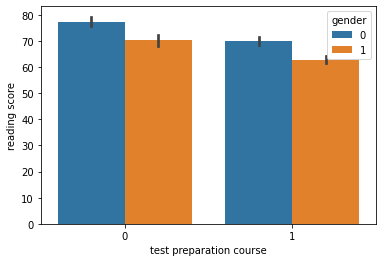

In [48]:
sns.barplot(x = "test preparation course", y = "reading score", data =df , hue = 'gender')

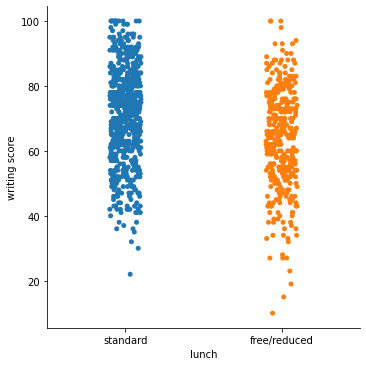

In [49]:
sns.catplot(x="lunch", y="writing score", data=df, ) 

C:\Users\reemh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



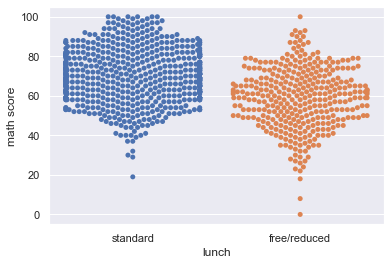

In [132]:
a = sns.swarmplot(y=df['math score'], x='lunch', data=df)

In [50]:
px.scatter(df, 'math score', 'reading score', color='parental level of education')


<AxesSubplot:xlabel='math score', ylabel='reading score'>

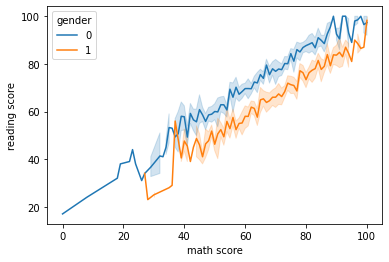

In [51]:
sns.lineplot(x="math score", y="reading score",
              hue="gender",
             data=df)

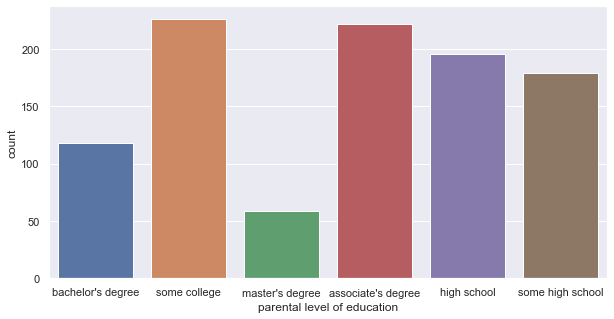

In [53]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x = 'parental level of education',data = df)
plt.show()

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

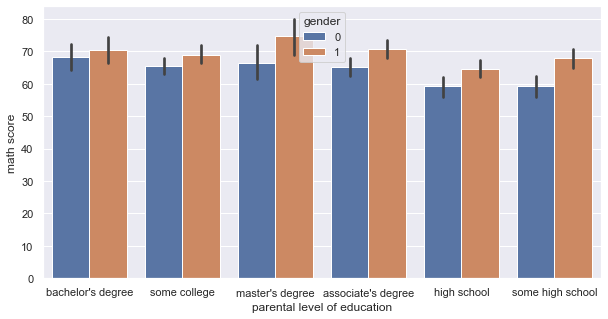

In [54]:
plt.figure(figsize = (10,5))
sns.barplot(x = "parental level of education", y = "math score", data = df, hue = 'gender')

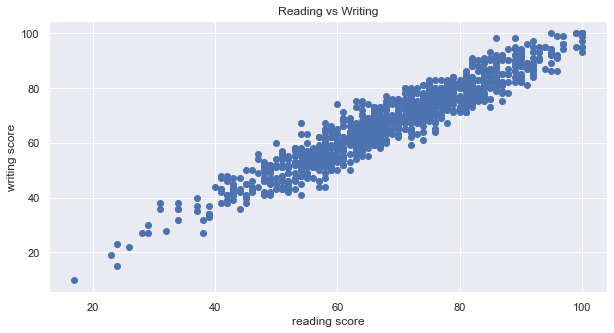

In [55]:
plt.title("Reading vs Writing")
plt.xlabel("reading score")
plt.ylabel("writing score")
plt.scatter(df["reading score"],df["writing score"])

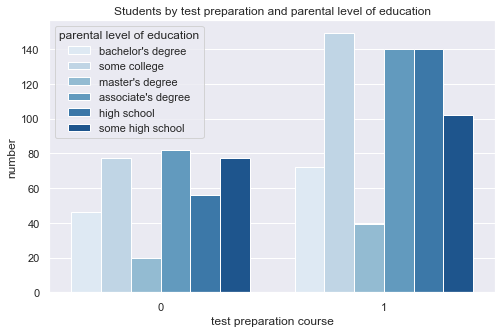

In [56]:
fig, ax = plt.subplots(figsize = (8, 5)) 
sns.countplot(data = df, x = "test preparation course", hue = "parental level of education", palette = "Blues")
ax.set(title = "Students by test preparation and parental level of education", ylabel = "number")
plt.show()

In [122]:
score_gender = df.groupby('gender').mean().reset_index()
score_gender
fig = px.bar(score_gender, x = "gender",
               y = ["math score", "reading score", "writing score"], barmode = "group")
fig.show()

In [123]:
score_lunch = df.groupby('lunch').mean().reset_index()
score_lunch
fig = px.bar(score_lunch, x = "lunch",
               y = ["math score", "reading score", "writing score"], barmode = "group")
fig.show()

# building a model

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.30)

# Regression Model

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
X = df[['math score', 'reading score', 'writing score']]

In [56]:
y_math = X['math score']
y_reading = X['reading score']
y_writing = X['writing score']

In [57]:
X_math = X[['reading score', 'writing score']]
X_reading = X[['math score', 'writing score']]
X_writing = X[['reading score', 'math score']]

In [58]:
X_math_train, X_math_test, y_math_train, y_math_test = train_test_split(X_math, y_math, train_size=0.7)
X_reading_train, X_reading_test, y_reading_train, y_reading_test = train_test_split(X_reading, y_reading, train_size=0.7)
X_writing_train, X_writing_test, y_writing_train, y_writing_test = train_test_split(X_writing, y_writing, train_size=0.7)

In [81]:

math_model = LinearRegression()
reading_model = LinearRegression()
writing_model = LinearRegression()

math_model.fit(X_math_train, y_math_train)
reading_model.fit(X_reading_train, y_reading_train)
writing_model.fit(X_writing_train, y_writing_train)

math_R = math_model.score(X_math_test, y_math_test)
reading_R = reading_model.score(X_reading_test, y_reading_test) 
writing_R = writing_model.score(X_writing_test, y_writing_test) 

math_R, reading_R, writing_R

(0.6799506885904376, 0.9124250194380988, 0.9140618491726569)